# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Aanswers to Q1, Q2 and Q3 here</p>
</div>

We will use a hypothesis test to see whether race has a significant impact on the rate of callbacks for resumes.
Our null hypothesis is that race doesn't have an impact. Alternative hypothesis is that race does have an impact, specifically white-sounding names get more callbacks than black-sounding names

First we will check the assumptions for using normal distribution is met:
1. random--resumes are randomly assigned as either w/b. So we've met this condition
2. normal--according to CLT, our sample size is 2435, the sampling distribution of sample mean is normally distributed
3. independent--the sample size is just small fraction of the total population so we can assume each observation is independent.


In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

w_callbacks=sum(w.call)
b_callbacks=sum(b.call)
w_callback_rate=w_callbacks/len(w.call)
b_callback_rate=b_callbacks/len(b.call)
diff_mean=w_callback_rate-b_callback_rate
print(w_callback_rate)
print(b_callback_rate)
print(diff_mean)

0.09650924024640657
0.06447638603696099
0.032032854209445585


In [6]:
# standard error of the sampling distribution of W-B, accordig to null hypothesis the mean of the distribution is 0.
# assume 5% confidence level

SE= np.sqrt(w_callback_rate*(1-w_callback_rate)/w.shape[0]+b_callback_rate*(1-b_callback_rate)/b.shape[0])
SE

0.0077833705866767544

In [7]:
# calculate p value
# lookup z table and find the critical z-value that there is a 5% chance that an observation will be larger than z*SE
z=1.65
z*SE

0.012842561468016643

Since the observed call back rate diff is 0.032 which is larger than critical point 0.012, we can reject null hypothesis. Therefore white-sounding names have higher call back rate than black-sounding names.

In [8]:
# calculate confidence interval

# having one observation that diff in call back ratio is 0.032. We can inference the ratio difference in population

[diff_mean-z*SE,diff_mean+z*SE]


[0.019190292741428944, 0.04487541567746223]

The confidence interval lower bound is larger than 0 which implies that we are 95% confident that white-sounding names are more likely to get callbacks than black-sounding names

In [9]:
# alternatively we can also simulate the experiments in python.
# assume that race doesn't have an impact. 

mix=pd.concat([w.call,b.call])
bs_replicas=np.empty(10000)

for i in range (10000):
    mix_per=np.random.permutation(mix.values)
    w_per=mix_per[:len(w.call)]
    b_per=mix_per[len(w.call):]
    w_ratio=np.sum(w_per)/len(w_per)
    b_ratio=np.sum(b_per)/len(b_per)
    bs_replicas[i]=w_ratio-b_ratio



In [10]:
p=np.sum(bs_replicas>=diff_mean)/len(bs_replicas)
p

0.0

Since P value is so low, lower than 5%, we can reject the null hypothesis.

<div class="span5 alert alert-success">
<p> Answers to Q4 and Q5 here </p>
</div>

<BarContainer object of 2 artists>

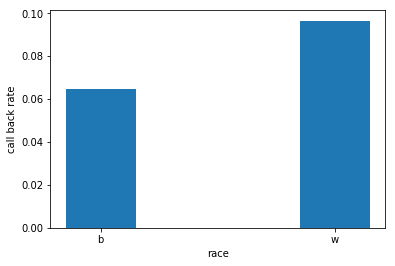

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
x=['b','w']
y=[b_callback_rate,w_callback_rate]
plt.xlabel('race')
plt.ylabel('call back rate')
plt.bar(x,y,width=0.3)

### summary:

In a study of race discrimination at workplace, the same resume has been randomly assigned white-sounding name and black sounding name and the call back rate from employers are compared for two groups. We can see from the summary graph above that white-sounding names have higher call back rates than black-sounding names, indicating racial discrimination exist at workplace. We've used hypothesis test and confidence level to prove that the difference in the call back rate, i.e. 0.032, doesn't happen by chance. The difference in call back rates is real and is favoring white-sounding names.

### Other factors:

Other than race, other factors all affect call back rate. For example: the quality of the resume. Higher quality resumes get higher call backs than lower quality resumes. (in the table below, a comparison of call back rate of people with special skill vs no special skill)


In [16]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [54]:
def ratio (series):
    '''This function calculate call back ratio'''
    
    return series.sum()/len(series)

sex=data.groupby(['specialskills'])['call'].agg(ratio)
sex

specialskills
0    0.059345
1    0.123673
Name: call, dtype: float32